In [8]:
'''
The purpose of this notebook is Exploratory Data Analysis, 
i.e. analyzing data sets to summarize their main characteristics, often with visual methods.

'''

'\nThe purpose of this notebook is Exploratory Data Analysis, \ni.e. analyzing data sets to summarize their main characteristics, often with visual methods.\n\n'

In [55]:
# Load libraries

from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load dataset
filename = "Restaurant_Scores_-_LIVES_Standard.csv"
names = ['business_id', 'business_name', 'business_address', 'business_city', 
         'business_state', 'business_postal_code', 'business_latitude', 'business_longitude', 
         'business_location', 'business_phone_number', 'inspection_id', 'inspection_date', 
         'inspection_score', 'inspection_type', 'violation_id', 'violation_description', 
         'risk_category'
        ]
dataset = read_csv(filename, names=names, low_memory = False)[1:] #removing the first row with names

#Take a first look at the data
print(dataset.head())

  business_id            business_name  business_address  business_city  \
1       69618  Fancy Wheatfield Bakery  1362 Stockton St  San Francisco   
2       97975               BREADBELLY   1408 Clement St  San Francisco   
3       69487   Hakkasan San Francisco       1 Kearny St  San Francisco   
4       91044    Chopsticks Restaurant   4615 Mission St  San Francisco   
5       85987                  Tselogs      552 Jones St  San Francisco   

  business_state business_postal_code business_latitude business_longitude  \
1             CA                94133               NaN                NaN   
2             CA                94118               NaN                NaN   
3             CA                94108               NaN                NaN   
4             CA                94112               NaN                NaN   
5             CA                94102               NaN                NaN   

  business_location business_phone_number   inspection_id  \
1               NaN

In [6]:
#Statistical distribution
print(dataset.describe())
'''
There is something wrong with business id: number of unique ids != number of unique business names
Also # of business_names > # of business addresses - several restaurants with same address or some addressses are not listed? 
We have much less inspection scores than inspections - probably won't be a good metrics
'''

       business_id        business_name business_address  business_city  \
count        53973                53973            53973          53973   
unique        6253                 5775             5673              1   
top          19373  Peet's Coffee & Tea      428 11th St  San Francisco   
freq            45                  151              200          53973   

       business_state business_postal_code business_latitude  \
count           53973                52787             27475   
unique              1                   62              2295   
top                CA                94110          37.80824   
freq            53973                 5921               207   

       business_longitude             business_location business_phone_number  \
count               27475                         27475                 17672   
unique               2323                          2373                  1931   
top           -122.410189  POINT (-122.410189 37.80824)     

1       2019-03-04
2       2019-07-25
3       2018-04-18
4       2017-08-18
5       2018-04-12
           ...    
53969   2019-05-06
53970   2019-03-14
53971   2019-05-06
53972   2019-05-06
53973   2019-05-06
Name: inspection_date, Length: 53973, dtype: datetime64[ns]


(array([4991., 3772., 4718., 6576., 6205., 5626., 3942., 6797., 7466.,
        3880.]),
 array([736241., 736356., 736471., 736586., 736701., 736816., 736931.,
        737046., 737161., 737276., 737391.]),
 <a list of 10 Patch objects>)

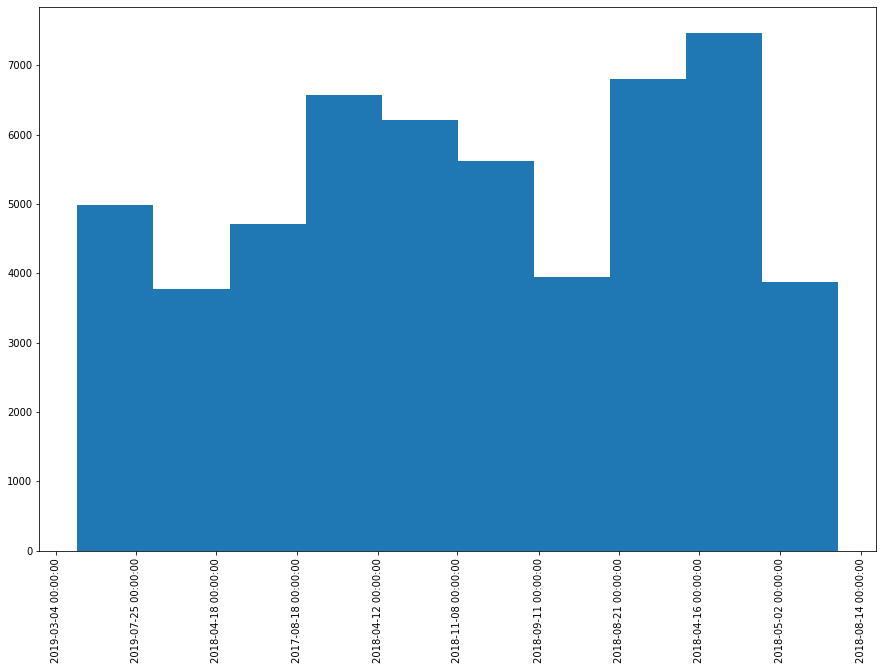

In [64]:
#Doesn't work yet
##I want to see dates of the inspection on a graph
'''
There is no real time, just date
'''
inspection_date = pd.to_datetime(dataset['inspection_date'])
print(inspection_date)
# print(inspection_date.shape())
# inspection_count = dataset.groupby('inspection_date').size()

# # inspection_count.reshape(1,-1)
# print(inspection_count)
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(inspection_date, rotation=90)
plt.hist(inspection_date.sort_values())

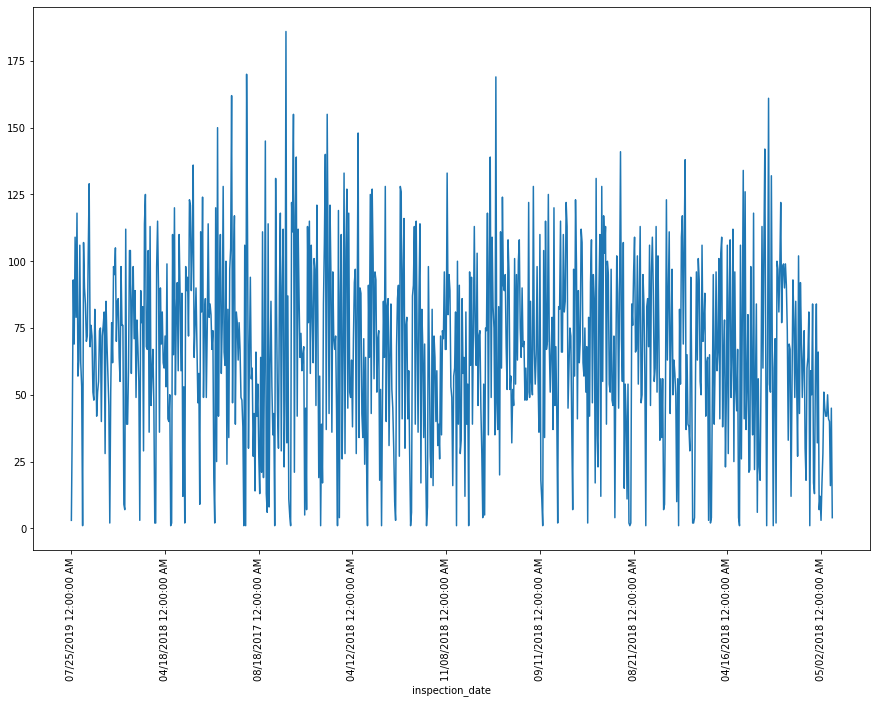

In [45]:
#Doesn't work yet
#Plot data
fig, ax = plt.subplots(figsize=(15,10))
inspection_count.plot()
ax.set_xticklabels(inspection_date, rotation=90)
plt.show()